In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
path = 'Data_paths.csv'
df_raw = pd.read_csv(path)

#df = df.drop(df[df['moa'] == 'Microtubule stabilizers'].sample(frac=0.75).index)
#df.reset_index(drop=True, inplace=True)

In [61]:
df_raw.moa.unique()

array(['Actin disruptors', 'Aurora kinase inhibitors',
       'Cholesterol-lowering', 'DNA damage', 'DNA replication',
       'Eg5 inhibitors', 'Epithelial', 'Kinase inhibitors',
       'Microtubule destabilizers', 'Microtubule stabilizers',
       'Protein degradation', 'Protein synthesis', 'DMSO'], dtype=object)

In [68]:
def get_random_sample(n_samples_pr_class = 10, label = None):
    while True:
        if label == None:
            df = df_raw.groupby('moa').sample(n=n_samples_pr_class).reset_index(drop=True)
        else:
            if type(label) == int:
                label = df_raw.moa.unique()[label]
            df = df_raw[df_raw.moa == label].sample(n=n_samples_pr_class).reset_index(drop=True)
        for path in df.path:
            img = np.load(path)
            yield img

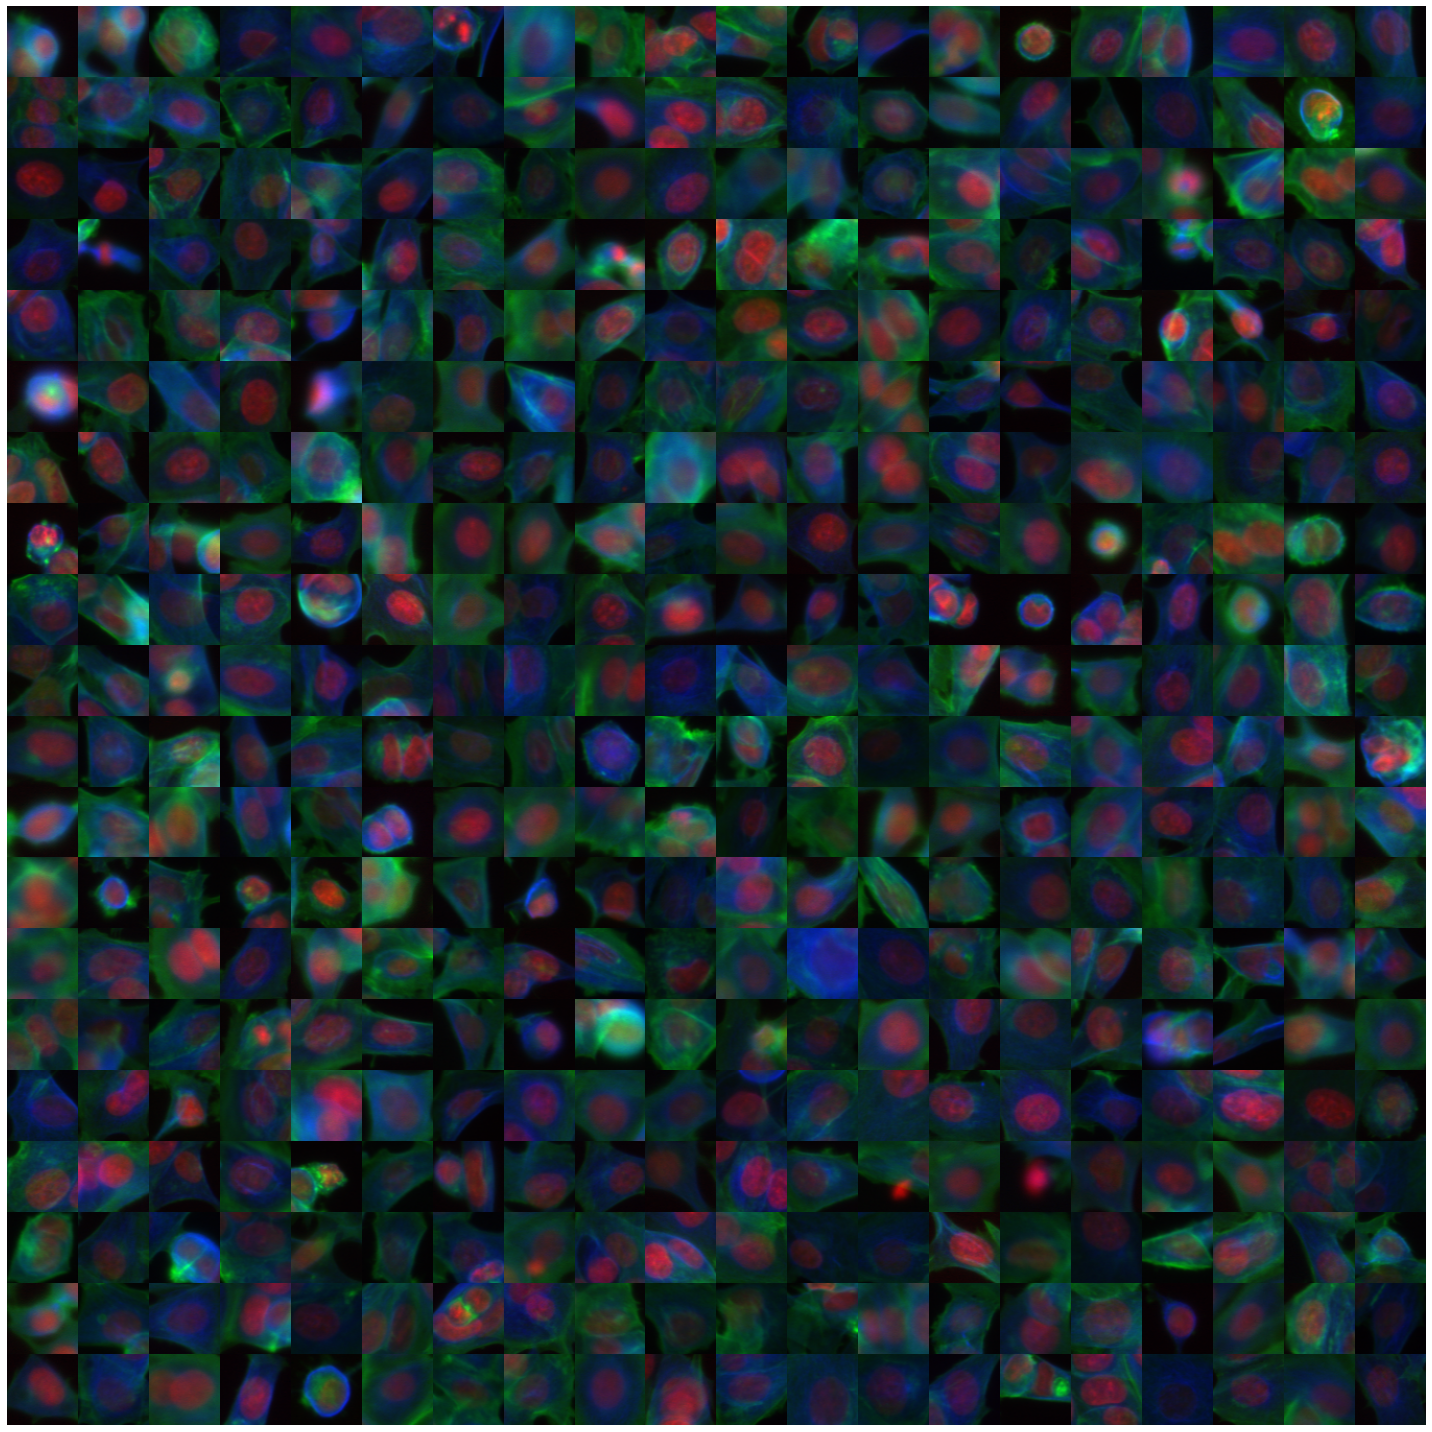

In [79]:
img_generator = get_random_sample(100, label = 'Protein degradation')
fig, rows = plt.subplots(10, 10, sharex= True, sharey = True, figsize= (20, 20), gridspec_kw=dict(hspace=0,wspace=0))

for row in rows:
    for ax in row:
        img = next(img_generator)
        ax.imshow(img)
        ax.axis('off')
plt.tight_layout()
#plt.savefig('Inspection\imgSamples.png')
plt.show()



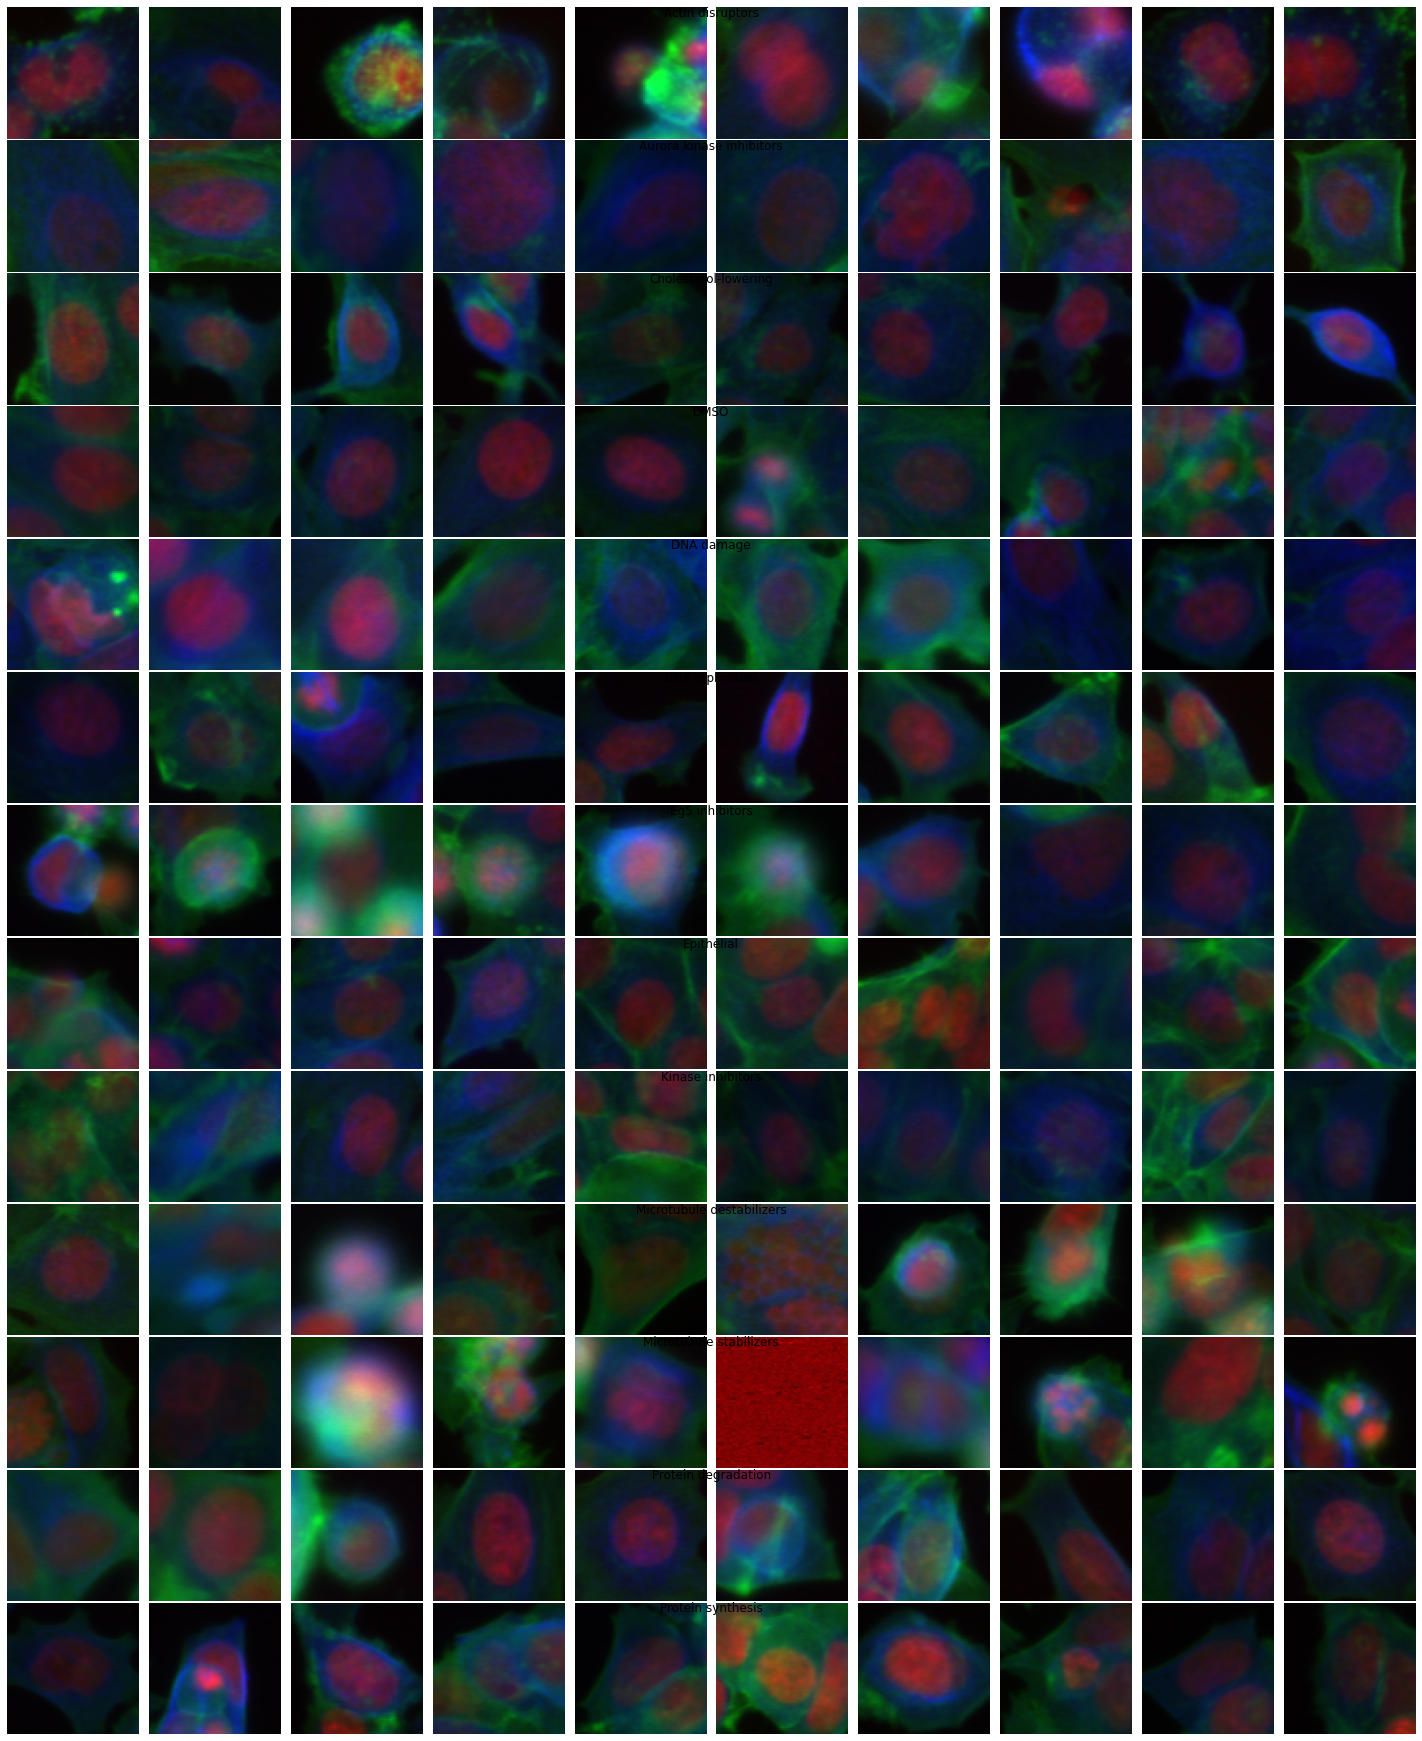

In [75]:
img_generator = get_random_sample(10)

fig = plt.figure(figsize=(20,24))
subfigs = fig.subfigures(nrows=len(df.moa.unique()), ncols=1)

for i, (label, subfig) in enumerate(zip(df.moa.unique(), subfigs)):
    subfig.suptitle(label, y=1)
    subfig.subplots_adjust(hspace=1)
    axs = subfig.subplots(nrows = 1, ncols=10, gridspec_kw=dict(hspace=0,wspace=0))
    for rgb, ax in enumerate(axs):
        img = next(img_generator)
        ax.imshow(img)
        ax.axis('off')

plt.savefig('Inspection\imgSamples.png')
plt.show()



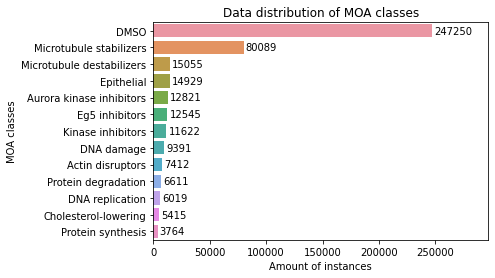

In [29]:
ax = sns.barplot(
    x = df_raw.moa.value_counts(),
    y = df_raw.moa.value_counts().index.tolist(),
    )

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', padding = 2)
ax.margins(x=0.2)

ax.set_title('Data distribution of MOA classes')
ax.set_xlabel('Amount of instances')
ax.set_ylabel('MOA classes')

plt.savefig('Inspection\DataDistibutionNumeric', bbox_inches = 'tight')
plt.show()

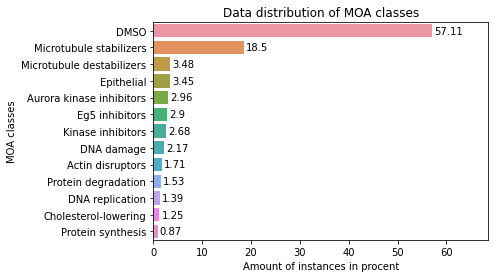

In [30]:
ax = sns.barplot(
    x = (df_raw.moa.value_counts(normalize=True)*100).round(2),
    y = df_raw.moa.value_counts().index.tolist(),
    )
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', padding = 2)
ax.margins(x=0.2)

ax.set_title('Data distribution of MOA classes')
ax.set_xlabel('Amount of instances in procent')
ax.set_ylabel('MOA classes')

plt.savefig('Inspection\DataDistibutionProcent', bbox_inches = 'tight')
plt.show()

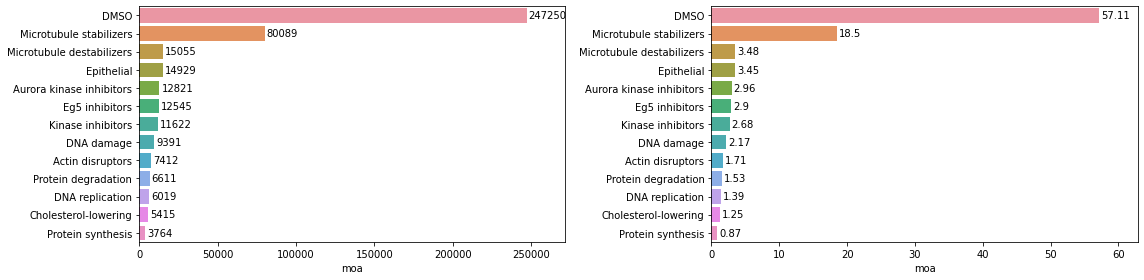

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
sns.barplot(
    x = df_raw.moa.value_counts(),
    y = df_raw.moa.value_counts().index.tolist(),
    ax = ax1 
    )
for bars in ax1.containers:
    ax1.bar_label(bars, label_type='edge', padding = 2)
    ax1.margins(x=0.1)

sns.barplot(
    x = (df_raw.moa.value_counts(normalize=True)*100).round(2),
    y = df_raw.moa.value_counts().index.tolist(),
    ax = ax2 
    )
for bars in ax2.containers:
    ax2.bar_label(bars, label_type='edge', padding = 2)
    ax2.margins(x=0.1)

plt.tight_layout()
plt.savefig('Inspection\Data Distibution', bbox_inches = 'tight')
plt.show()



In [32]:
df = df_raw[df_raw.moa != 'DMSO']

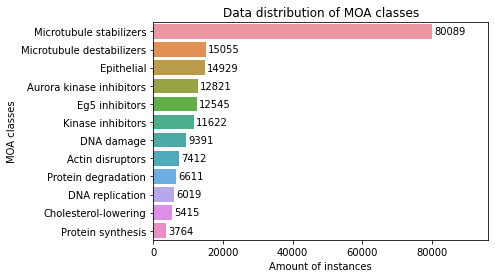

In [33]:
ax =sns.barplot(
    x = df.moa.value_counts(),
    y = df.moa.value_counts().index.tolist(),
    )

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', padding = 2)
ax.margins(x=0.2)

ax.set_title('Data distribution of MOA classes')
ax.set_xlabel('Amount of instances')
ax.set_ylabel('MOA classes')

plt.savefig('Inspection\DataDistibutionNegDMSONumeric', bbox_inches = 'tight')
plt.show()

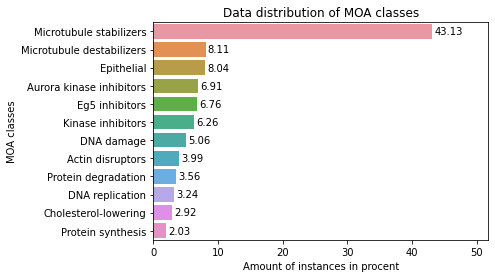

In [34]:
ax = sns.barplot(
    x = (df.moa.value_counts(normalize=True)*100).round(2),
    y = df.moa.value_counts().index.tolist(),
    )

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', padding = 2)
ax.margins(x=0.2)

ax.set_title('Data distribution of MOA classes')
ax.set_xlabel('Amount of instances in procent')
ax.set_ylabel('MOA classes')

plt.savefig('Inspection\DataDistibutionNegDMSOProcent', bbox_inches = 'tight')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
sns.barplot(
    x = df.moa.value_counts(),
    y = df.moa.value_counts().index.tolist(),
    ax = ax1 
    )
for bars in ax1.containers:
    ax1.bar_label(bars, label_type='edge', padding = 2)
    ax1.margins(x=0.1)

sns.barplot(
    x = (df.moa.value_counts(normalize=True)*100).round(2),
    y = df.moa.value_counts().index.tolist(),
    ax = ax2 
    )
for bars in ax2.containers:
    ax2.bar_label(bars, label_type='edge', padding = 2)
    ax2.margins(x=0.1)

plt.tight_layout()
plt.savefig('Inspection\DataDistibutionNegDMSO')
plt.show()



In [ ]:
def inspect_class(label):
    df_label = df_raw[df_raw.moa == label]
    n_label = len(df_label)
    arr_label = np.empty((n_label, 68, 68, 3))
    for index, path in enumerate(df_label.path):
        img = np.load(path)
        img = img/255
        arr_label[index,:] = img
    mu_label = np.mean(arr_label, axis = 0)
    
    del arr_label
    
    
    
    return mu_label

In [ ]:
basePath = 'F:\Programming\DTU\Human MCF7\Segmented\Inspection\ClassMean'

for label in df_raw.moa.unique():
    mu = inspect_class(label)
    path = os.path.join(basePath, label)
    np.save(path, mu)
    
    plt.imshow(mu)
    plt.axis('off')
    plt.title(label)
    plt.savefig(path)
    plt.show()
    

In [ ]:
dmsomean = np.load('F:\Programming\DTU\Human MCF7\Segmented\Inspection\ClassMean\DMSO.npy')

In [ ]:
def normalize_dmso(label, dmsomean):
    df_label = df[df.moa == label]
    n_label = len(df_label)
    arr_label = np.empty((n_label, 68, 68, 3))
    for index, path in enumerate(df_label.path):
        img = np.load(path)
        img = img/255
        img - dmsomean
        arr_label[index,:] = img
        
    z = (arr_label - np.mean(arr_label, axis=0))/np.std(arr_label)
    
    mu_label = np.mean(arr_label, axis = 0)
    
    del arr_label
    
    return mu_label

In [ ]:
basePath = 'F:\Programming\DTU\Human MCF7\Segmented\Inspection\ClassMeanNormalized'
for label in df.moa.unique():
    mu = normalize_dmso(label, dmsomean)
    path = os.path.join(basePath, label)
    np.save(path, mu)
    
    mu = (mu - np.min(mu))/(np.max(mu)-np.min(mu))
    
    plt.imshow(mu)
    plt.axis('off')
    plt.title(label)
    plt.savefig(path)
    plt.show()


In [ ]:
basePath = 'F:\Programming\DTU\Human MCF7\Segmented\Inspection\ClassMeanNormalized'
n_labels = len(df.moa.unique())


fig, axs = plt.subplots(nrows = n_labels, ncols=3, gridspec_kw=dict(hspace=0.2,wspace=0.01), figsize=(6, 30))

for i, (label, ax) in enumerate(zip(df.moa.unique(), axs)):
    path = os.path.join(basePath, label+'.npy')
    img = np.load(path)
    for rgb, plot in enumerate(ax):
        if rgb == 1:
            plot.set_title(label)
        canvas = np.zeros((68,68,3))
        canvas[:,:,rgb] = img[:,:,rgb]
        canvas = (canvas - np.min(canvas))/(np.max(canvas)-np.min(canvas))
        plot.imshow(canvas)
        plot.axis('off')

filename = 'RGB'

plt.savefig(os.path.join(basePath, filename))
plt.show()


       


In [ ]:
basePath = 'F:\Programming\DTU\Human MCF7\Segmented\Inspection\ClassMeanNormalized'
n_labels = len(df.moa.unique())

fig = plt.figure(figsize=(8,30))
# fig.suptitle('Title')

subfigs = fig.subfigures(nrows=len(df.moa.unique()), ncols=1)

for i, (label, subfig) in enumerate(zip(df.moa.unique(), subfigs)):
    subfig.suptitle(label, y=1.08)
    subfig.subplots_adjust(hspace=1)
    axs = subfig.subplots(nrows = 1, ncols=3, gridspec_kw=dict(hspace=0.1,wspace=0.01))

    path = os.path.join(basePath, label+'.npy')
    img = np.load(path)
    
    for rgb, ax in enumerate(axs):
        
        ax.set_title(['red', 'green', 'blue'][rgb])
        
        canvas = img[:,:,rgb]
        canvas = (canvas - np.min(canvas))/(np.max(canvas)-np.min(canvas))
        ax.imshow(canvas, cmap='gray')
        ax.axis('off')
        
filename = 'RGB_grey'

plt.savefig(os.path.join(basePath, filename))    
plt.show()

In [ ]:
del df_raw

In [ ]:
n = len(df)

arr_label = np.empty((n, 68, 68, 3), dtype=np.float32)
for index, path in enumerate(df.path):
    img = np.load(path)
    img = img/255
    img - dmsomean
    arr_label[index,:] = img
    
z = (arr_label - np.mean(arr_label, axis=0))/np.std(arr_label)

var_label = np.var(arr_label, axis = 0)


In [ ]:

img = (var_label - np.min(var_label)) / (np.max(var_label) - np.min(var_label))

In [ ]:
basePath = 'F:\Programming\DTU\Human MCF7\Segmented\Inspection\ClassMeanNormalized'
plt.imshow(img)
plt.axis('off')
plt.title('Variance of data normalized by DMSO')
plt.savefig(os.path.join(basePath, 'variance'))

In [ ]:
fig = plt.figure(figsize=(8,8))
axs = fig.subplots(nrows = 1, ncols=3, gridspec_kw=dict(hspace=0.1,wspace=0.01))
for rgb, ax in enumerate(axs):
    ax.set_title(['red', 'green', 'blue'][rgb])
    canvas = img[:,:,rgb]
    canvas = (canvas - np.min(canvas))/(np.max(canvas)-np.min(canvas))
    ax.imshow(canvas, cmap='gray')
    ax.axis('off')


In [ ]:
fig = plt.figure(figsize=(8,8))
axs = fig.subplots(nrows = 1, ncols=3, gridspec_kw=dict(hspace=0.1,wspace=0.01))
for rgb, ax in enumerate(axs):
    ax.set_title(['red', 'green', 'blue'][rgb])
    canvas = np.zeros((68,68,3))
    canvas[:,:,rgb] = img[:,:,rgb]
    canvas = (canvas - np.min(canvas))/(np.max(canvas)-np.min(canvas))
    ax.imshow(canvas)
    ax.axis('off')
plt.savefig('VarianceRGB')

In [ ]:
np.save('DMSONormalizedVariance', var_label)